In [29]:
import os
import shutil
import pandas as pd

# Chemins
chemin_fichier = "batch_4.csv"  # Remplacez par le chemin réel du fichier CSV
chemin_images = "validation_filtré"  # Dossier contenant les images originales
chemin_destination = "validation"  # Dossier de destination des images triées

# Charger le fichier CSV
df = pd.read_csv(chemin_fichier, sep=',')  # Modifier le séparateur si nécessaire

# Création des dossiers et déplacement des images
for index, row in df.iterrows():
    image_name = row['image_name']
    category = str(row['category'])  # S'assurer que c'est une chaîne
    
    # Définir le chemin du dossier cible
    dossier_categorie = os.path.join(chemin_destination, category)
    os.makedirs(dossier_categorie, exist_ok=True)  # Crée le dossier s'il n'existe pas
    
    # Déplacer l'image
    image_source = os.path.join(chemin_images, image_name)
    image_dest = os.path.join(dossier_categorie, image_name)
    
    if os.path.exists(image_source):
        shutil.move(image_source, image_dest)
    else:
        print(f"Image non trouvée : {image_source}")

print("Organisation terminée !")


Image non trouvée : validation_filtré\image_631246_product_984304.jpg
Image non trouvée : validation_filtré\image_1063831_product_1157144.jpg
Image non trouvée : validation_filtré\image_137609430_product_1906192.jpg
Image non trouvée : validation_filtré\image_158554130_product_1288702.jpg
Image non trouvée : validation_filtré\image_197401530_product_5913718.jpg
Image non trouvée : validation_filtré\image_310317432_product_46565050.jpg
Image non trouvée : validation_filtré\image_438012288_product_49843702.jpg
Image non trouvée : validation_filtré\image_858194557_product_92413946.jpg
Image non trouvée : validation_filtré\image_874538407_product_102313516.jpg
Image non trouvée : validation_filtré\image_508685383_product_52348929.jpg
Image non trouvée : validation_filtré\image_933246596_product_190099934.jpg
Image non trouvée : validation_filtré\image_875245740_product_120815258.jpg
Image non trouvée : validation_filtré\image_890393093_product_112462775.jpg
Image non trouvée : validation_f

Neural Network perso

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Chemins
chemin_train = "dataset"

img_height, img_width = 150, 150
batch_size = 32

# Préparation des données
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
)
train_generator = train_datagen.flow_from_directory(
    chemin_train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    chemin_train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])



# Compilation du modèle
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30
)

# Sauvegarde du modèle
model.save("modele_cnn.h5")
print("Modèle entraîné et sauvegardé !")

Found 234 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


Epoch 1/30
8/8 [==============================] - 6s 561ms/step - loss: 13.8667 - accuracy: 0.2863
Epoch 2/30
8/8 [==============================] - 4s 514ms/step - loss: 1.6523 - accuracy: 0.3504
Epoch 3/30
8/8 [==============================] - 4s 465ms/step - loss: 1.6419 - accuracy: 0.3291
Epoch 4/30
8/8 [==============================] - 4s 467ms/step - loss: 1.6649 - accuracy: 0.3889
Epoch 5/30
8/8 [==============================] - 4s 458ms/step - loss: 1.6445 - accuracy: 0.3932
Epoch 6/30
8/8 [==============================] - 4s 517ms/step - loss: 1.6363 - accuracy: 0.3974
Epoch 7/30
8/8 [==============================] - 4s 521ms/step - loss: 1.6686 - accuracy: 0.4188
Epoch 8/30
8/8 [==============================] - 5s 587ms/step - loss: 1.5878 - accuracy: 0.3974
Epoch 9/30
8/8 [==============================] - 6s 670ms/step - loss: 1.5926 - accuracy: 0.4017
Epoch 10/30
8/8 [==============================] - 5s 575ms/step - loss: 1.6310 - accuracy: 0.3889
Epoch 11/30
8/8 [=

Found 119 images belonging to 10 classes.
4/4 [==============================] - 1s 183ms/step


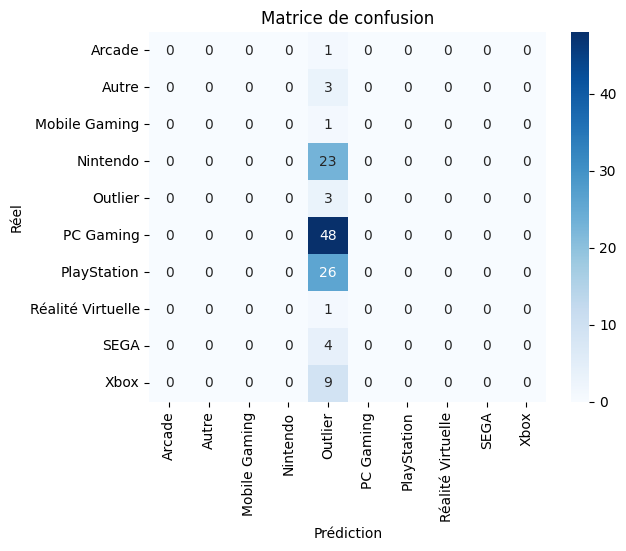

                   precision    recall  f1-score   support

           Arcade       0.00      0.00      0.00         1
            Autre       0.00      0.00      0.00         3
    Mobile Gaming       0.00      0.00      0.00         1
         Nintendo       0.00      0.00      0.00        23
          Outlier       0.03      1.00      0.05         3
        PC Gaming       0.00      0.00      0.00        48
      PlayStation       0.00      0.00      0.00        26
Réalité Virtuelle       0.00      0.00      0.00         1
             SEGA       0.00      0.00      0.00         4
             Xbox       0.00      0.00      0.00         9

         accuracy                           0.03       119
        macro avg       0.00      0.10      0.00       119
     weighted avg       0.00      0.03      0.00       119



C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [19]:
import os
import shutil
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Chemins

chemin_test = "test"

# Paramètres du modèle
img_height, img_width = 150, 150
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator= test_datagen.flow_from_directory(
    chemin_test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Chargement du modèle
model = keras.models.load_model("modele_cnn.h5")

# Évaluation sur le jeu de test
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# Rapport de classification
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


Filtre sur les classes peu frèquentes

In [ ]:
import os
import shutil

def filtrer_classes(dossier_source, dossier_destination, classes_à_garder):
    if not os.path.exists(dossier_destination):
        os.makedirs(dossier_destination)

    for classe in os.listdir(dossier_source):
        if classe not in classes_à_garder:
            continue
        chemin_classe_source = os.path.join(dossier_source, classe)
        chemin_classe_dest = os.path.join(dossier_destination, classe)
        os.makedirs(chemin_classe_dest, exist_ok=True)

        for image in os.listdir(chemin_classe_source):
            shutil.copy(
                os.path.join(chemin_classe_source, image),
                os.path.join(chemin_classe_dest, image)
            )

# Étape 1 : Identifier les classes valides dans le dataset d'entraînement
dataset_dir = "dataset"
min_images = 10
classes_valides = [cls for cls in os.listdir(dataset_dir)
                   if len(os.listdir(os.path.join(dataset_dir, cls))) >= min_images]

# Étape 2 : Appliquer le filtrage sur les 3 jeux
filtrer_classes("dataset", "dataset_filtré", classes_valides)
filtrer_classes("validation", "validation_filtré", classes_valides)

filtrer_classes("test", "test_filtré", classes_valides)


In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

C:\Users\jimmy\AppData\Local\Temp\ipykernel_25796\2849600788.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


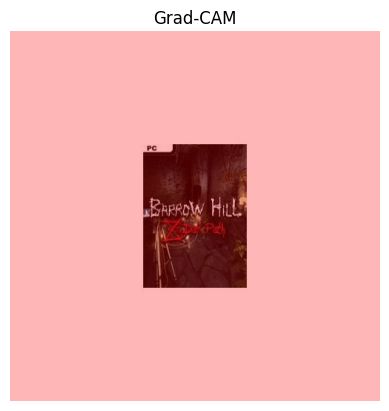

In [24]:
import tensorflow as tf
import matplotlib.cm as cm

# Fonction pour créer la carte Grad-CAM
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Choisir une image du test set
img_path = test_generator.filepaths[2]  # ou n'importe quelle image du jeu test
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # même préprocessing que le modèle

# Trouver le nom de la dernière couche convolutionnelle
model.summary()  # Regarde ici le nom de la dernière couche conv
last_conv_layer_name = 'conv2d_8'  # À adapter selon ton modèle !

# Générer la heatmap Grad-CAM
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Superposer la heatmap sur l'image
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.title("Grad-CAM")
    plt.show()

display_gradcam(img_path, heatmap)


Transfert learning baseline

Found 106 images belonging to 4 classes.
Found 172 images belonging to 4 classes.
Found 41 images belonging to 4 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       


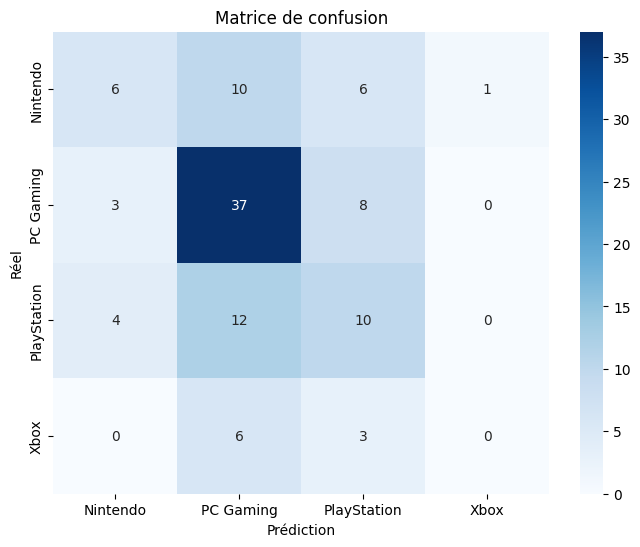


=== Rapport de classification ===
              precision    recall  f1-score   support

    Nintendo       0.46      0.26      0.33        23
   PC Gaming       0.57      0.77      0.65        48
 PlayStation       0.37      0.38      0.38        26
        Xbox       0.00      0.00      0.00         9

    accuracy                           0.50       106
   macro avg       0.35      0.35      0.34       106
weighted avg       0.45      0.50      0.46       106


Accuracy globale : 0.5000
Précision globale : 0.3503


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

img_height, img_width = 150, 150
batch_size = 32
epochs = 50


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% pour la validation
)

test_generator = val_test_datagen.flow_from_directory(
    'test_filtré',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


train_generator = train_val_datagen.flow_from_directory(
    'dataset_filtré',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_val_datagen.flow_from_directory(
    'dataset_filtré',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)



base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False 

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# === Entraînement ===
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stop]
)

model.save("modele_cnn_transfer.h5")
print("Modèle sauvegardé !")


# Prédictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

print("\n=== Rapport de classification ===")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

acc = accuracy_score(y_true, y_pred_classes)
prec = precision_score(y_true, y_pred_classes, average='macro')
print(f"\nAccuracy globale : {acc:.4f}")
print(f"Précision globale : {prec:.4f}")


gradcam

Heatmap générée avec succès.


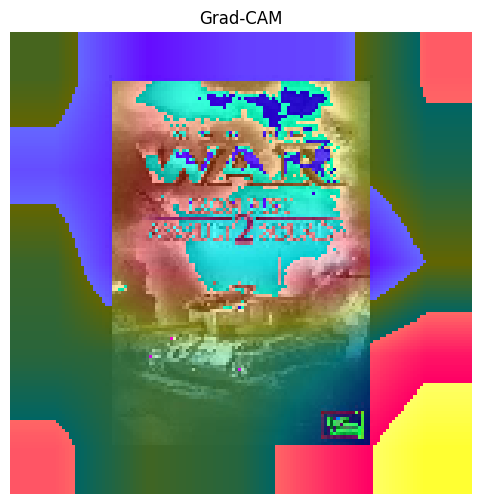

In [37]:
import cv2
inputs = tf.keras.Input(shape=(img_height, img_width, 3))

base_model = tf.keras.applications.MobileNetV2(
    input_tensor=inputs,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

def make_gradcam_heatmap(img_array, grad_model, pred_index=None):
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    if heatmap is None:
        print("Erreur: la heatmap est vide.")
    else:
        print("Heatmap générée avec succès.")

    return heatmap.numpy()


def display_gradcam(original_img, heatmap, alpha=0.4):
    img = cv2.resize(original_img, (img_width, img_height))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap_color * alpha + img
    superimposed_img = np.uint8(superimposed_img)

    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM")
    plt.show()


last_conv_layer_name = "Conv_1"
last_conv_layer = base_model.get_layer(last_conv_layer_name).output

grad_model = tf.keras.Model(inputs=model.input, outputs=[last_conv_layer, model.output])

img_path = test_generator.filepaths[30]
img_pil = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img_pil)
img_array_exp = np.expand_dims(img_array, axis=0) / 255.0

heatmap = make_gradcam_heatmap(img_array_exp, grad_model)

display_gradcam(img_array, heatmap) 



gradcam resize test

Heatmap générée avec succès.


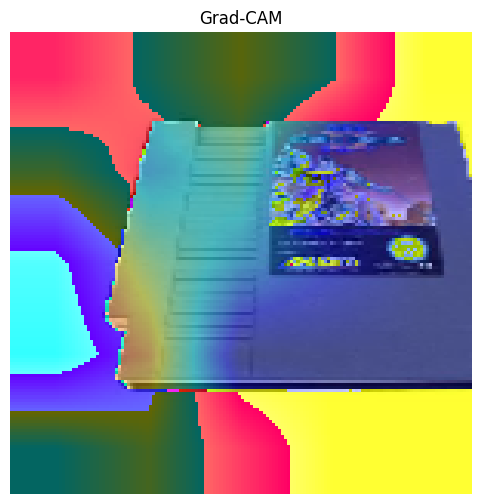

In [ ]:
import cv2
inputs = tf.keras.Input(shape=(img_height, img_width, 3))

def crop_and_resize_from_heatmap(original_img, heatmap, target_size=(224, 224), threshold=0.4):
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = heatmap / np.max(heatmap)  # normalize
    
    mask = heatmap > threshold
    ys, xs = np.where(mask)

    if len(xs) == 0 or len(ys) == 0:
        print("⚠️ Aucun hotspot détecté, fallback au resize standard.")
        return cv2.resize(original_img, target_size)
    
    x_min, x_max = xs.min(), xs.max()
    y_min, y_max = ys.min(), ys.max()
    
    # + margin (optional)
    margin = 10
    x_min = max(x_min - margin, 0)
    y_min = max(y_min - margin, 0)
    x_max = min(x_max + margin, original_img.shape[1])
    y_max = min(y_max + margin, original_img.shape[0])
    
    cropped_img = original_img[y_min:y_max, x_min:x_max]
    resized_img = cv2.resize(cropped_img, target_size)
    return resized_img


base_model = tf.keras.applications.MobileNetV2(
    input_tensor=inputs,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

def make_gradcam_heatmap(img_array, grad_model, pred_index=None):
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    if heatmap is None:
        print("Erreur: la heatmap est vide.")
    else:
        print("Heatmap générée avec succès.")

    return heatmap.numpy()


def display_gradcam(original_img, heatmap, alpha=0.4):
    img = cv2.resize(original_img, (img_width, img_height))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap_color * alpha + img
    superimposed_img = np.uint8(superimposed_img)

    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM")
    plt.show()


last_conv_layer_name = "Conv_1"
last_conv_layer = base_model.get_layer(last_conv_layer_name).output

grad_model = tf.keras.Model(inputs=model.input, outputs=[last_conv_layer, model.output])

img_path = test_generator.filepaths[0]
img_pil = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img_pil)
img_array_exp = np.expand_dims(img_array, axis=0) / 255.0

heatmap = make_gradcam_heatmap(img_array_exp, grad_model)

cropped_img = crop_and_resize_from_heatmap(img_array, heatmap, target_size=(img_width, img_height))
display_gradcam(cropped_img, heatmap)


Transfert learning fine tune sans data augmentation

Found 172 images belonging to 4 classes.


Found 41 images belonging to 4 classes.
Found 106 images belonging to 4 classes.
Epoch 1/10
6/6 [==============================] - 11s 844ms/step - loss: 2.0981 - accuracy: 0.2209 - val_loss: 1.4004 - val_accuracy: 0.3171
Epoch 2/10
6/6 [==============================] - 3s 552ms/step - loss: 1.7285 - accuracy: 0.3605 - val_loss: 1.3831 - val_accuracy: 0.3415
Epoch 3/10
6/6 [==============================] - 3s 620ms/step - loss: 1.4920 - accuracy: 0.3721 - val_loss: 1.3823 - val_accuracy: 0.4146
Epoch 4/10
6/6 [==============================] - 3s 626ms/step - loss: 1.4156 - accuracy: 0.3895 - val_loss: 1.2216 - val_accuracy: 0.4390
Epoch 5/10
6/6 [==============================] - 3s 612ms/step - loss: 1.4031 - accuracy: 0.4535 - val_loss: 1.3173 - val_accuracy: 0.3902
Epoch 6/10
6/6 [==============================] - 4s 576ms/step - loss: 1.3521 - accuracy: 0.4012 - val_loss: 1.2837 - val_accuracy: 0.3902
Epoch 7/10
6/6 [==============================] - 4s 652ms/step - loss: 1.2703

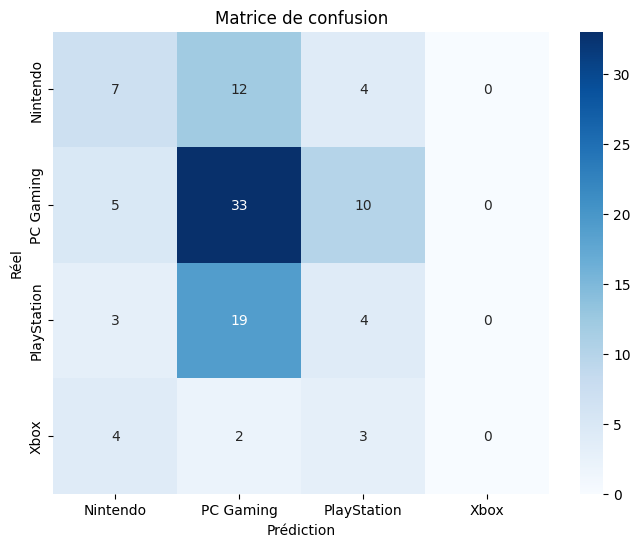


=== Rapport de classification ===
              precision    recall  f1-score   support

    Nintendo       0.37      0.30      0.33        23
   PC Gaming       0.50      0.69      0.58        48
 PlayStation       0.19      0.15      0.17        26
        Xbox       0.00      0.00      0.00         9

    accuracy                           0.42       106
   macro avg       0.26      0.29      0.27       106
weighted avg       0.35      0.42      0.38       106


Accuracy globale : 0.4151
Précision globale : 0.2647


C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

img_height, img_width = 150, 150
batch_size = 32
epochs = 50

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_val_datagen.flow_from_directory(
    'dataset_filtré',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_val_datagen.flow_from_directory(
    'dataset_filtré',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


test_generator = val_test_datagen.flow_from_directory(
    'test_filtré',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True

fine_tune_at = 100  # Choisis une valeur vers la fin
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
# === Construction du modèle complet ===
global_average_layer = layers.GlobalAveragePooling2D()
dropout = layers.Dropout(0.5)
prediction_layer = layers.Dense(train_generator.num_classes, activation='softmax')

inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = dropout(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # 5–10 epochs suffisent souvent
    callbacks=[early_stop]
)


model.summary()

# === Entraînement ===
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stop]
)

model.save("modele_cnn_transfer.h5")
print("✅ Modèle sauvegardé !")


y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

print("\n=== Rapport de classification ===")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

acc = accuracy_score(y_true, y_pred_classes)
prec = precision_score(y_true, y_pred_classes, average='macro')
print(f"\nAccuracy globale : {acc:.4f}")
print(f"Précision globale : {prec:.4f}")


transfert learning fine tune avec data augmentation

Found 213 images belonging to 4 classes.
Found 0 images belonging to 0 classes.


Found 106 images belonging to 4 classes.
Epoch 1/30
7/7 [==============================] - 8s 474ms/step - loss: 2.6003 - accuracy: 0.1878
Epoch 2/30
7/7 [==============================] - 3s 466ms/step - loss: 2.0700 - accuracy: 0.2347
Epoch 3/30
7/7 [==============================] - 3s 395ms/step - loss: 1.8820 - accuracy: 0.3521
Epoch 4/30
7/7 [==============================] - 3s 373ms/step - loss: 1.6537 - accuracy: 0.3850
Epoch 5/30
7/7 [==============================] - 3s 374ms/step - loss: 1.6089 - accuracy: 0.3850
Epoch 6/30
7/7 [==============================] - 3s 377ms/step - loss: 1.5540 - accuracy: 0.4131
Epoch 7/30
7/7 [==============================] - 3s 373ms/step - loss: 1.5875 - accuracy: 0.4085
Epoch 8/30
7/7 [==============================] - 3s 379ms/step - loss: 1.5377 - accuracy: 0.3897
Epoch 9/30
7/7 [==============================] - 3s 419ms/step - loss: 1.6072 - accuracy: 0.3568
Epoch 10/30
7/7 [==============================] - 3s 377ms/step - loss: 1.41

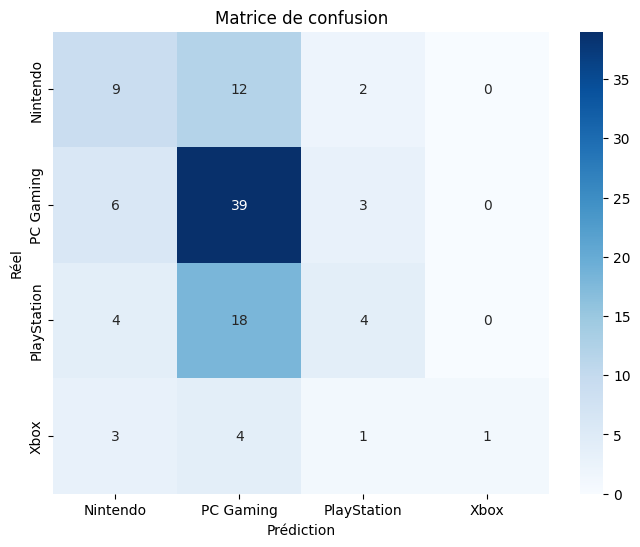


=== Rapport de classification ===
              precision    recall  f1-score   support

    Nintendo       0.41      0.39      0.40        23
   PC Gaming       0.53      0.81      0.64        48
 PlayStation       0.40      0.15      0.22        26
        Xbox       1.00      0.11      0.20         9

    accuracy                           0.50       106
   macro avg       0.59      0.37      0.37       106
weighted avg       0.51      0.50      0.45       106



In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight


# === PARAMÈTRES ===
img_height, img_width = 150, 150
batch_size = 32
num_epochs = 30

train_dir = "dataset_filtré"
val_dir = "validation"
test_dir = "test_filtré"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
y_train = train_generator.classes

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

base_model = keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # gelé pour première phase

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=num_epochs,
    callbacks=[early_stop]
)

base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop],
    class_weight=class_weights

)


y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# === RAPPORT DE CLASSIFICATION ===
print("\n=== Rapport de classification ===")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))
acc = accuracy_score(y_true, y_pred_classes)
prec = precision_score(y_true, y_pred_classes, average='macro')
print(f"\nAccuracy globale : {acc:.4f}")
print(f"Précision globale : {prec:.4f}")

gradcam

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model

# === PARAMÈTRES ===
model_path = "modele_cnn_transfer.h5"
img_path = "validation_filtré/Nintendo/images.jpg"
img_size = (150, 150)

# === 1. CHARGER LE MODÈLE ===
model = load_model(model_path)

# === 2. IDENTIFIER LA DERNIÈRE COUCHE CONV ===
def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if hasattr(layer, 'output_shape') and len(layer.output_shape) == 4:
            return layer.name
    raise ValueError("Aucune couche convolutionnelle trouvée.")
    
last_conv_layer_name = find_last_conv_layer(model)
print(f"Dernière couche conv : {last_conv_layer_name}")

# === 3. PRÉTRAITEMENT IMAGE ===
def load_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    return np.expand_dims(img_array, axis=0), img

# === 4. GRAD-CAM ===
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Récupération de la couche
    conv_layer = model.get_layer(last_conv_layer_name)
    
    # Reconstruction du graphe avec entrées/sorties explicites
    grad_model = Model(
        inputs=[model.input],
        outputs=[conv_layer.output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Calcul des gradients
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap + 1e-10)
    return heatmap.numpy()

# === 5. AFFICHAGE ===
def display_gradcam(img_path, heatmap, original_img, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, img_size)

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(img, 1 - alpha, heatmap_color, alpha, 0)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Image originale")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# === 6. PRÉDICTION + EXÉCUTION ===
img_array, original_img = load_preprocess_image(img_path, img_size)
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
display_gradcam(img_path, heatmap, original_img)

# Prédiction
pred = model.predict(img_array)
print("Classe prédite :", np.argmax(pred), " (score =", np.max(pred), ")")


Dernière couche conv : mobilenetv2_1.00_224


ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'") at layer "Conv1". The following previous layers were accessed without issue: []

In [ ]:
model = tf.keras.models.load_model("modele_cnn_transfer.h5")

mobilenet = model.get_layer('mobilenetv2_1.00_224')

for layer in mobilenet.layers:
    print(layer.name)

input_3
Conv1
bn_Conv1
Conv1_relu
expanded_conv_depthwise
expanded_conv_depthwise_BN
expanded_conv_depthwise_relu
expanded_conv_project
expanded_conv_project_BN
block_1_expand
block_1_expand_BN
block_1_expand_relu
block_1_pad
block_1_depthwise
block_1_depthwise_BN
block_1_depthwise_relu
block_1_project
block_1_project_BN
block_2_expand
block_2_expand_BN
block_2_expand_relu
block_2_depthwise
block_2_depthwise_BN
block_2_depthwise_relu
block_2_project
block_2_project_BN
block_2_add
block_3_expand
block_3_expand_BN
block_3_expand_relu
block_3_pad
block_3_depthwise
block_3_depthwise_BN
block_3_depthwise_relu
block_3_project
block_3_project_BN
block_4_expand
block_4_expand_BN
block_4_expand_relu
block_4_depthwise
block_4_depthwise_BN
block_4_depthwise_relu
block_4_project
block_4_project_BN
block_4_add
block_5_expand
block_5_expand_BN
block_5_expand_relu
block_5_depthwise
block_5_depthwise_BN
block_5_depthwise_relu
block_5_project
block_5_project_BN
block_5_add
block_6_expand
block_6_expand

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# === Charger le modèle entraîné ===
model = tf.keras.models.load_model("modele_cnn_transfer.h5")

# === Paramètres ===
img_size = (150, 150)  # Doit correspondre à ce que tu as utilisé à l'entraînement
last_conv_layer_name = 'mobilenetv2_1.00_224'  # Nom de la couche convolutionnelle dans MobileNetV2

# Fonction pour créer la heatmap Grad-CAM
def make_gradcam_heatmap(img_array, model, conv_layer_name="mobilenetv2_1.00_224", pred_index=None):
    # Créer un modèle qui retourne à la fois la sortie de la couche convolutionnelle et la sortie du modèle
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        # Obtenir les sorties des couches convolutionnelles et de classification
        conv_outputs, predictions = grad_model(img_array)
        
        # Si aucun indice de prédiction n'est passé, utiliser celui de la classe avec la probabilité maximale
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        
        class_channel = predictions[:, pred_index]

    # Calculer les gradients de la classe par rapport aux activations de la couche de convolution
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Appliquer la pondération des activations par les gradients moyens
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normaliser la heatmap entre 0 et 1
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-10)
    return heatmap.numpy()

# Fonction pour pré-traiter l'image
def preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img, img_array

# Fonction pour afficher Grad-CAM
def display_gradcam(img_path, heatmap, alpha=0.4):
    # Charger l’image originale
    img = cv2.imread(img_path)
    img = cv2.resize(img, (150, 150))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Convertir la heatmap en format couleur
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superposer heatmap et image
    superimposed_img = cv2.addWeighted(img, 1 - alpha, heatmap_color, alpha, 0)

    # Afficher l'image
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Grad-CAM")
    plt.show()

# Exemple d’utilisation :
img_path = "test_filtré\\Nintendo\\image_23276830_product_1533426.jpg"

# Prétraitement de l'image
img, img_array = preprocess_image(img_path)

# Prédictions du modèle
preds = model.predict(img_array)
pred_class = np.argmax(preds[0])
print(f"✅ Prédiction : {pred_class} (probabilité : {np.max(preds):.4f})")

# Créer la heatmap Grad-CAM
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_class)

# Afficher la Grad-CAM
display_gradcam(img_path, heatmap)


1/1 [==============================] - 1s 870ms/step
✅ Prédiction : 1 (probabilité : 0.3599)


ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'") at layer "Conv1". The following previous layers were accessed without issue: []

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 1,866,564
Non-train